In [1]:
import networkx as nx
import numpy as np
from jaccard_implementation import jaccard_similarity_communities_optimal
from newman_greedy import newman_greedy_distance
from cluster_graphs import generate_full_cluster_graph_same_size
import matplotlib.pyplot as plt
from color_communites import color_communities

In [7]:
times_to_average = 1

cluster_values = np.linspace(3,16,times_to_average).astype(int)
cluster_node_values = np.linspace(1,50,50).astype(int)
gamma_values = np.linspace(0.0001,0.1,100)

optimal_gammas = np.zeros(50)

for clusters in cluster_values:
    for i, cluster_nodes in enumerate(cluster_node_values):
        optimal_gamma = None 
        max_accuracy = 0
        graph = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
        actual_communities = [[k * cluster_nodes + i for i in range(cluster_nodes)] for k in range(clusters)]
        for gamma in gamma_values:
            calculated_communities = newman_greedy_distance(graph, gamma)
            accuracy = jaccard_similarity_communities_optimal(actual_communities, calculated_communities)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_gamma = gamma
        optimal_gammas[i] += optimal_gamma

optimal_gammas = optimal_gammas / times_to_average


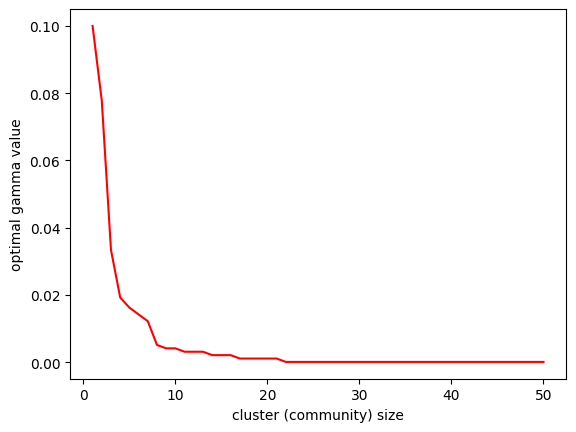

In [8]:
plt.plot(cluster_node_values, optimal_gammas, c='red')
plt.xlabel('cluster (community) size')
plt.ylabel('optimal gamma value')
plt.savefig('./plots/gamma_wrt_cluster_nodes.pdf')



In [9]:
# exponential decay optimisation: find c,l,k so that c*exp(-l* gamma) + k best describes the optimal_gammas array

from scipy.optimize import curve_fit

def model(x,c,l):
    return c*np.exp(-l*x)

params, covariance = curve_fit(model, cluster_node_values, optimal_gammas, p0=[1,1])
c_opt, l_opt = params

print(c_opt, l_opt)

0.1616558536042243 0.4500547630497226


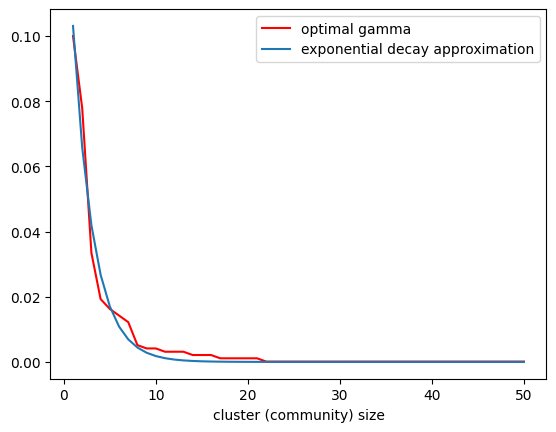

In [11]:
plt.plot(cluster_node_values, optimal_gammas, c='red', label='optimal gamma')
x = np.linspace(1,50,50)
plt.plot(x, c_opt*np.exp(-l_opt*x), label='exponential decay approximation')
plt.xlabel('cluster (community) size')
plt.legend()
plt.savefig('./plots/gammas_approximation.pdf')


In [15]:
# optimal gamma over graph size
how_many_sizes_to_test = 60

sizes = np.linspace(20,150,how_many_sizes_to_test)
cluster_values = [1,2,5,10]
gamma_values = np.linspace(0.00001,0.1,100)
optimal_gammas_1 = np.zeros(how_many_sizes_to_test)
optimal_gammas_2 = np.zeros(how_many_sizes_to_test)
optimal_gammas_5 = np.zeros(how_many_sizes_to_test)
optimal_gammas_10 = np.zeros(how_many_sizes_to_test)


for i, size in enumerate(sizes):
    optimal_gamma = None
    for clusters in cluster_values:
        cluster_nodes = int(size / clusters)
        max_accuracy = 0
        optimal_gamma_cl = None
        graph = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
        actual_communities = [[k * cluster_nodes + i for i in range(cluster_nodes)] for k in range(clusters)]
        for gamma in gamma_values:
            calculated_communities = newman_greedy_distance(graph, gamma)
            accuracy = jaccard_similarity_communities_optimal(actual_communities, calculated_communities)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_gamma_cl = gamma
        # optimal gamma is correct for cluster 
        if (clusters==1):
            optimal_gammas_1[i] = optimal_gamma_cl
        elif (clusters == 2):
            optimal_gammas_2[i] = optimal_gamma_cl
        elif (clusters == 5):
            optimal_gammas_5[i] = optimal_gamma_cl
        elif (clusters == 10):
            optimal_gammas_10[i] = optimal_gamma_cl
    


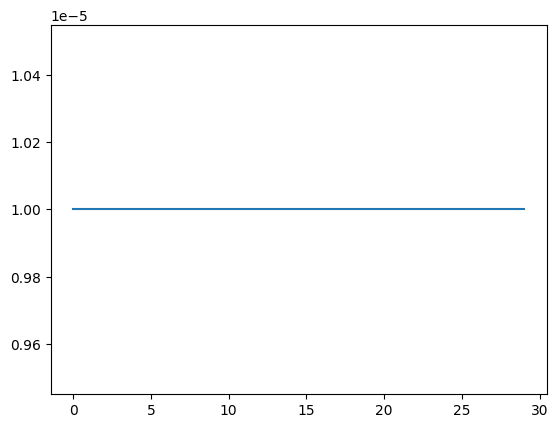

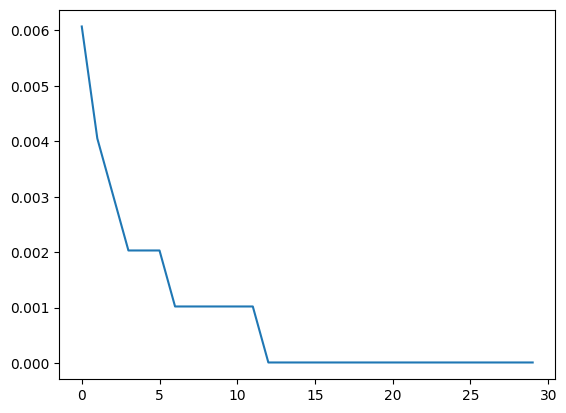

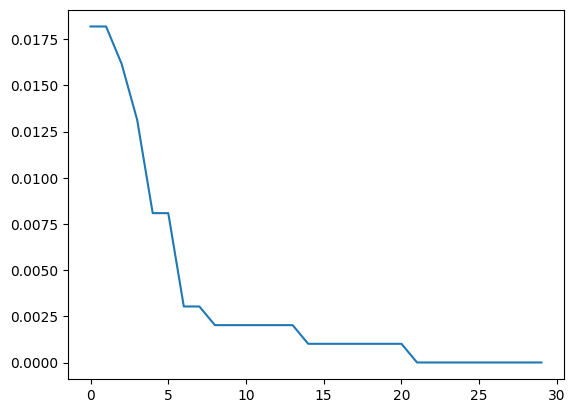

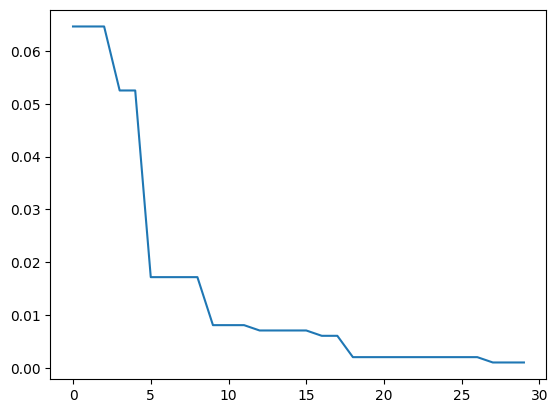

In [14]:
plt.figure()
plt.plot(optimal_gammas_1)
plt.figure()
plt.plot(optimal_gammas_2)
plt.figure()
plt.plot(optimal_gammas_5)
plt.figure()
plt.plot(optimal_gammas_10)

0.01648168648220195 0.054209826831779724
0.17435323255246235 0.040591939025177666


/tmp/ipykernel_7486/1821531790.py:2: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-l*x)
/tmp/ipykernel_7486/1821531790.py:2: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-l*x)
/tmp/ipykernel_7486/1821531790.py:2: RuntimeWarning: overflow encountered in multiply
  return c*np.exp(-l*x)


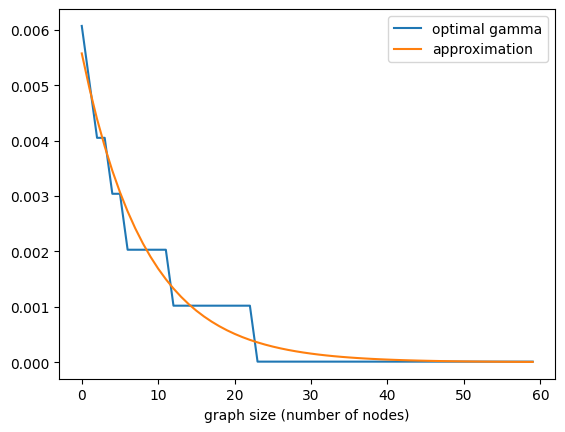

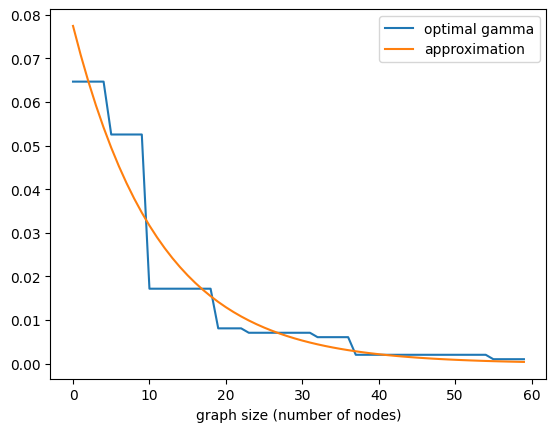

In [31]:
def model(x,c,l):
    return c*np.exp(-l*x)

params, covariance = curve_fit(model, sizes, optimal_gammas_2, p0=[1,1])
c_opt, l_opt = params

print(c_opt, l_opt)
plt.figure()
plt.plot(optimal_gammas_2, label='optimal gamma')
plt.plot(c_opt*np.exp(-l_opt*sizes), label='approximation')
plt.xlabel('graph size (number of nodes)')
plt.legend()
plt.savefig('./plots/optgamma_over_size_2_app.pdf')


params, covariance = curve_fit(model, sizes, optimal_gammas_10, p0=[1,1])
c_opt, l_opt = params

print(c_opt, l_opt)

plt.figure()
plt.plot(optimal_gammas_10, label='optimal gamma')
plt.plot(c_opt*np.exp(-l_opt*sizes), label='approximation')
plt.xlabel('graph size (number of nodes)')
plt.legend()
plt.savefig('./plots/optgamma_over_size_10_app.pdf')

Optimal c: 0.027428309104206346
Optimal l: 0.010142847227083406


/tmp/ipykernel_7486/983637532.py:46: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-l*x)
/tmp/ipykernel_7486/983637532.py:46: RuntimeWarning: overflow encountered in multiply
  return c*np.exp(-l*x)


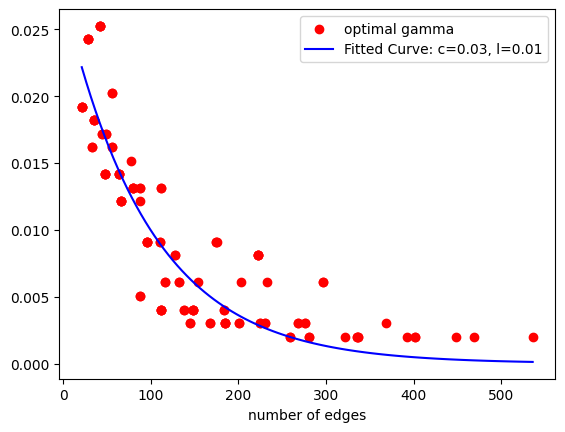

In [53]:
# gamma with respect to edge number 


cluster_values = np.linspace(3,8,10).astype(int)
cluster_node_values = np.linspace(4,12,12).astype(int)
gamma_values = np.linspace(0.0000001,0.1,100)

data_points = np.empty((0, 2))

for clusters in cluster_values:
    for i, cluster_nodes in enumerate(cluster_node_values):
        optimal_gamma = None 
        max_accuracy = 0
        graph = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
        actual_communities = [[k * cluster_nodes + i for i in range(cluster_nodes)] for k in range(clusters)]
        for gamma in gamma_values:
            calculated_communities = newman_greedy_distance(graph, gamma)
            accuracy = jaccard_similarity_communities_optimal(actual_communities, calculated_communities)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_gamma = gamma

        # we have found optimal gamma for clusters and cluster_nodes
        # Append the data to the array
        data_points = np.vstack([data_points, [graph.number_of_edges(), optimal_gamma]])




# Convert data_points to a NumPy array if it's a list of tuples
data_points = np.array(data_points)


# Extract the two variables
x_data = data_points[:, 0]  # The edges (x-values)
y_data = data_points[:, 1]  # The optimal_gamma (y-values)


sorted_indices = np.argsort(x_data)
x_data = x_data[sorted_indices]
y_data = y_data[sorted_indices]



def model(x,c,l):
    return c*np.exp(-l*x)

p0 = [1, 1]  # Initial guess: max(y_data) for c, and 1 for l

# Fit the curve to the data
params, covariance = curve_fit(model, x_data, y_data, p0=p0)

# Extract the optimal parameters
c_opt, l_opt = params
print("Optimal c:", c_opt)
print("Optimal l:", l_opt)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, c='red', label='optimal gamma')
x_fit = np.linspace(np.min(x_data), np.max(x_data), 100)
y_fit = model(x_fit, c_opt, l_opt)
plt.plot(x_fit, y_fit, label=f'Fitted Curve: c={c_opt:.2f}, l={l_opt:.2f}', color='blue')

plt.legend()
plt.xlabel('number of edges')
plt.savefig('./plots/EDGES_GAMMA_FIT.pdf')


[[np.int64(0)], [np.int64(1)], [np.int64(2)], [np.int64(3)], [np.int64(4)], [np.int64(5)], [np.int64(6)], [np.int64(7)], [np.int64(8)], [np.int64(9)], [np.int64(10)], [np.int64(11)], [np.int64(12)], [np.int64(13)], [np.int64(14)], [np.int64(15)], [np.int64(16)], [np.int64(17)], [np.int64(18)], [np.int64(19)], [np.int64(20)], [np.int64(21)], [np.int64(22)], [np.int64(23)], [np.int64(24)], [np.int64(25)], [np.int64(26)], [np.int64(27)], [np.int64(28)], [np.int64(29)]]


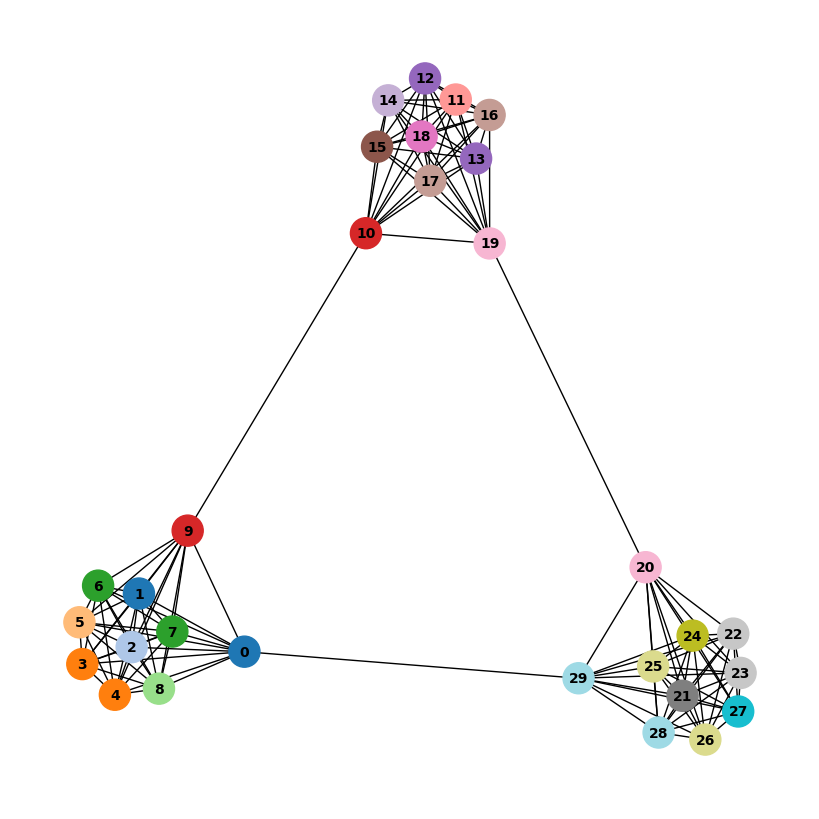

In [32]:
gamma = 0.02
clusters = 3
cluster_nodes = 10
g = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
comm = newman_greedy_distance(g, gamma)
print(comm)
color_communities(g,comm)
plt.savefig('./plots/gammachange'+str(clusters)+','+str(cluster_nodes)+'gamma='+str(gamma)+'.pdf')

[[np.int64(1)], [np.int64(2)], [np.int64(3)], [np.int64(4)], [np.int64(5)], [np.int64(6)], [np.int64(7)], [np.int64(8)], [np.int64(9)], [np.int64(10)], [np.int64(11), np.int64(0)], [np.int64(13)], [np.int64(14)], [np.int64(15)], [np.int64(16)], [np.int64(17)], [np.int64(18)], [np.int64(19)], [np.int64(20)], [np.int64(21)], [np.int64(22)], [np.int64(23), np.int64(12)], [np.int64(25)], [np.int64(26)], [np.int64(27)], [np.int64(28)], [np.int64(29)], [np.int64(30)], [np.int64(31)], [np.int64(32)], [np.int64(33)], [np.int64(34)], [np.int64(35), np.int64(24)]]
[[np.int64(4), np.int64(3), np.int64(2), np.int64(1)], [np.int64(10), np.int64(9), np.int64(8), np.int64(7)], [np.int64(16), np.int64(15), np.int64(14), np.int64(13)], [np.int64(22), np.int64(21), np.int64(20), np.int64(19)], [np.int64(24), np.int64(23), np.int64(18), np.int64(17), np.int64(12)], [np.int64(30), np.int64(29), np.int64(28), np.int64(27), np.int64(26), np.int64(25)], [np.int64(34), np.int64(33), np.int64(32), np.int64(31)

<Figure size 640x480 with 0 Axes>

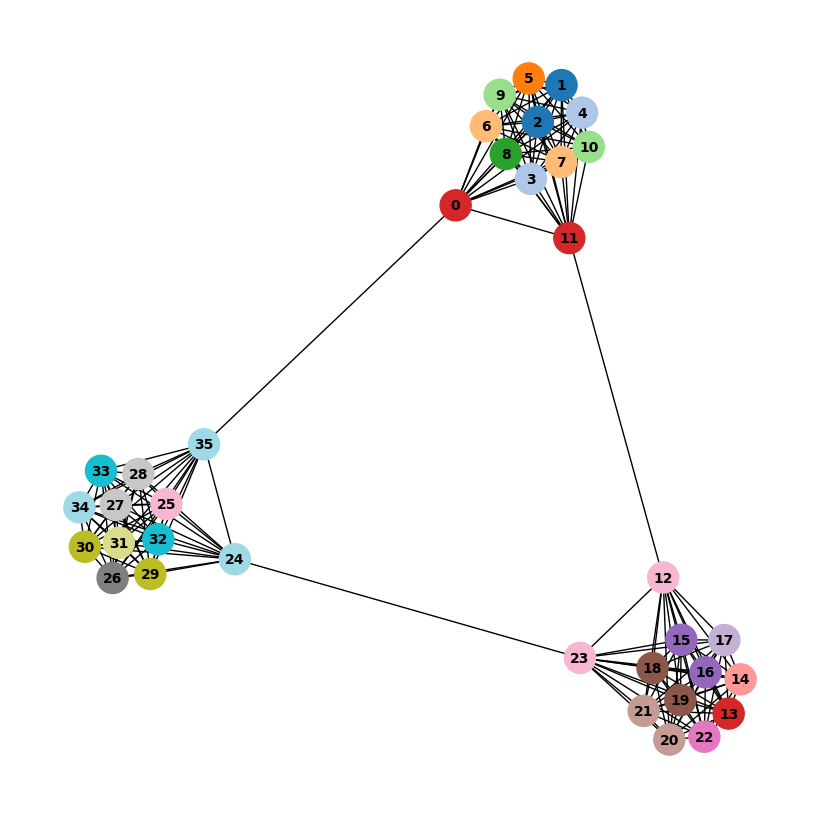

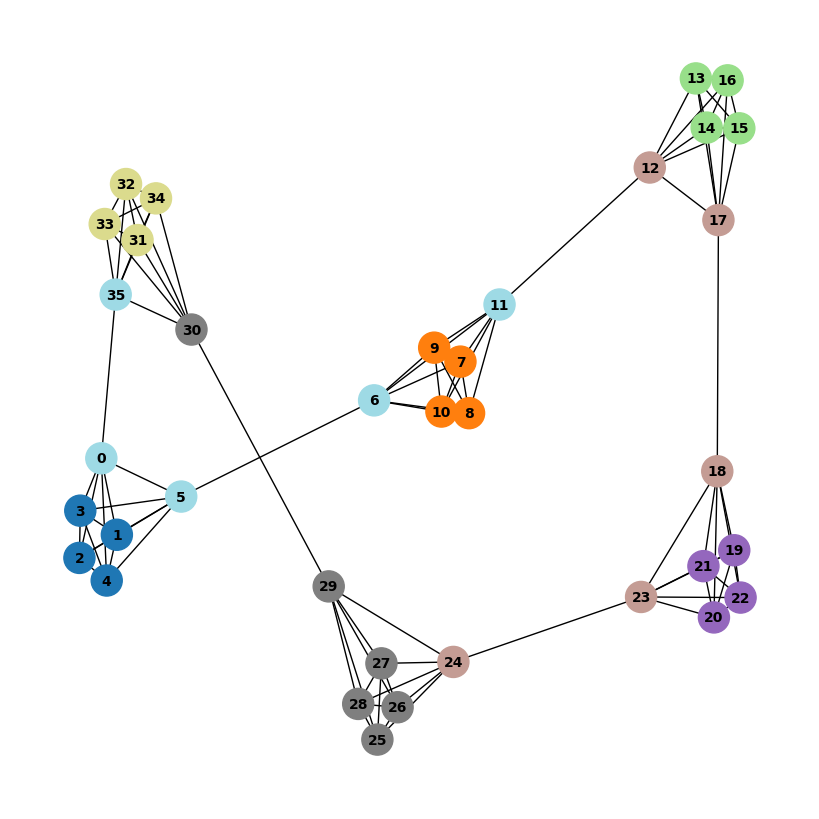

In [25]:
# same size, different cluster size
G1 = generate_full_cluster_graph_same_size(3,12)
G2 = generate_full_cluster_graph_same_size(6,6)
G = nx.disjoint_union(G1, G2)

gamma = 0.01

plt.figure()
comm_1 = newman_greedy_distance(G1, gamma)
comm_2 = newman_greedy_distance(G2, gamma)
print(comm_1)
print(comm_2)
color_communities(G1, comm_1)
plt.savefig('./plots/nonconnected_ssize_dcs'+str(gamma)+'1.pdf')
color_communities(G2, comm_2)
plt.savefig('./plots/nonconnected_ssize_dcs'+str(gamma)+'2.pdf')

[[4, 0, 3, 2, 1], [9, 5, 8, 7, 6], [14, 10, 13, 12, 11], [19, 15, 18, 17, 16], [24, 20, 23, 22, 21], [29, 25, 28, 27, 26], [34, 30, 33, 32, 31], [39, 35, 38, 37, 36], [44, 40, 43, 42, 41], [49, 45, 48, 47, 46], [54, 50, 53, 52, 51], [59, 55, 58, 57, 56], [64, 60, 63, 62, 61]]


<Figure size 640x480 with 0 Axes>

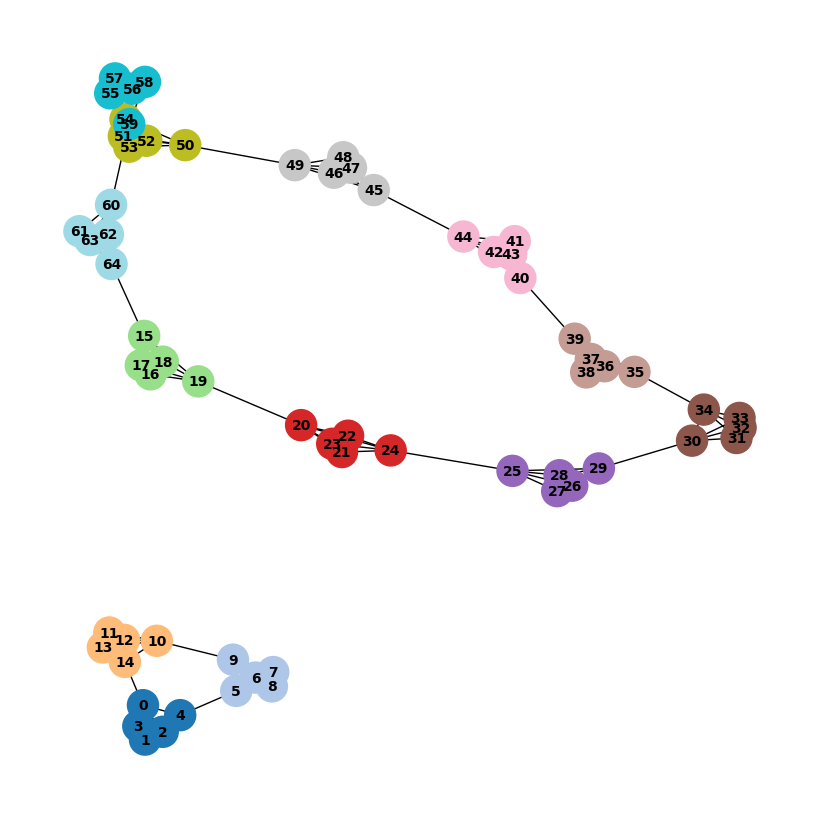

In [36]:
# same cluster size, different size
G1 = generate_full_cluster_graph_same_size(3,5)
G2 = generate_full_cluster_graph_same_size(10,5)
G = nx.disjoint_union(G1, G2)

gamma = 0.02

plt.figure()
comm = newman_greedy_distance(G, gamma)
print(comm)
color_communities(G, comm)
plt.savefig('./plots/nonconnected_scs_dsize'+str(gamma)+'.pdf')